In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pathces
from PIL import Image
%matplotlib inline

In [11]:
Sample_raw_x = 128
Sample_raw_y = 128

rpn_stride = 8

Feature_size_X = Sample_raw_x/rpn_stride
Feature_size_Y = Sample_raw_y/rpn_stride

scales = [1,2,4]
ratios =[0.5,1,2] 

In [12]:
def anchor(Feature_size_X,Feature_size_Y,rpn_stride,scales,ratios):
    scales,ratios = np.meshgrid(scales,ratios)
    scales,ratios = scales.flatten(),ratios.flatten()
    
    #计算anchor的尺寸
    scalesX = scales * np.sqrt(ratios)  #宽度
    scalesY = scales / np.sqrt(ratios)  #长度
    
    # anchor point 映射
    shiftX = np.arange(0,Feature_size_X) * rpn_stride
    shiftY = np.arange(0,Feature_size_Y) * rpn_stride
    
    # anchor point 在原图的位置
    shiftX,shiftY = np.meshgrid(shiftX,shiftY)
    
    # 每个anchor点上需要9个框
    centerX,anchorX = np.meshgrid(shiftX,scalesX)
    centerY,anchorY = np.meshgrid(shiftY,scalesY)
    
    # stack 各种尺寸，各种比例 对应的各种长度
    anchor_center = np.stack([centerY,centerX],axis=2).reshape(-1,2)
    anchor_size = np.stack([anchorY,anchorX],axis=2).reshape(-1,2)
    
    
    #左上右下的坐标点输出
    boxes = np.concatenate([anchor_center-0.5*anchor_size,anchor_center+0.5*anchor_size],axis=1)
    return boxes
    

In [14]:
anchors = anchor(Feature_size_X,Feature_size_Y,rpn_stride,scales,ratios)
anchors.shape

(2304, 4)

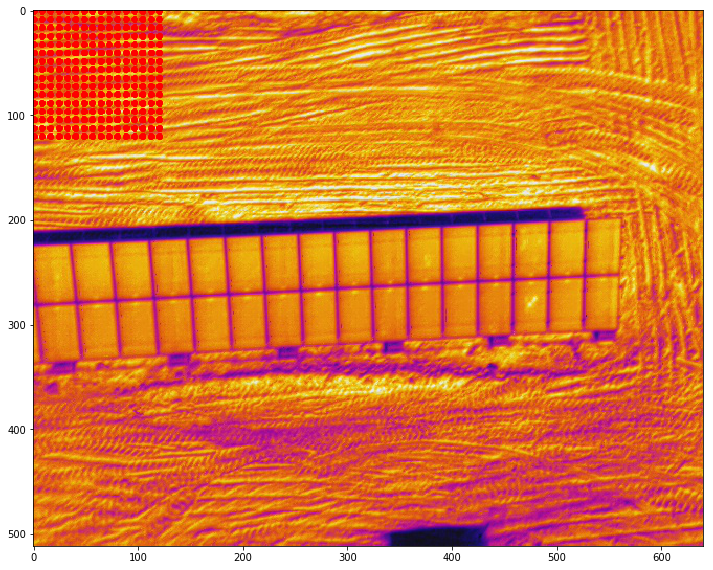

In [20]:
plt.figure(figsize=(12,12))
image = Image.open('test.jpg')
plt.imshow(image)

asx = plt.gca()
for i in range(anchors.shape[0]):
    box = anchors[i]
    #print(box)
    rec = pathces.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],edgecolor='r',facecolor='none')
    asx.add_patch(rec)